# 다항 회귀(Polynomial Regression)

* 데이터가 비선형의 형태일 때, 각 변수의 거듭제곱을 새로운 변수로 추가한 선형 모델
* scikit-learn의 PolynomialFeatures(degree=n)을 활용한다.
  * 만약 n=3이고, 변수가 $a,\ b$라면 $a,\ a^2,\ a^3,\ b,\ b^2,\ b^3$뿐만 아니라 $ab,\ ab^2,\ a^2b$도 변수로 추가된다.
* 고차 다항 회귀를 적용하면 훈련데이터에 적합한 모델을 생성할 수 있지만, 과대적합의 가능성이 있어 주의할 필요가 있다.

### scikit-learn의 PolynomialFeatures
* 다항 회귀는 다항변수를 생성한 뒤 LinearRegression 함수에 적용하면 된다.

In [3]:
# class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
    # degree : 다항식의 차수, default는 2
    # interaction_only : 교차항(ab, ab^2등)을 추가할지 결정한다. True인 경우 교차항만 생성, False(default)인 경우 교차항과 함께 동일한 변수의 거듭제곱 항도 추가된다.
    # include_bias : bias 컬럼을 추가할지 결정한다. True(default)인 경우 bias 컬럼 추가, False인 경우 추가하지 않는다.

import pandas as pd
cereal = pd.read_csv('./data/cereal.csv')
print(cereal.info())

# 분석에 필요한 데이터만 추출하기 위한 전처리
cereal.drop(columns=['name', 'mfr', 'type'], inplace=True)
cereal = cereal[cereal['sugars'] >= 0]
print(cereal.info())
print(cereal.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 76
Data columns (total 13 columns):
 #   Column    Non-Null C

/var/folders/fw/2dys5ylj2x7d0x79mh5jkmy80000gn/T/ipykernel_1980/2113595558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal_2.sort_values(by='sugars', inplace=True)


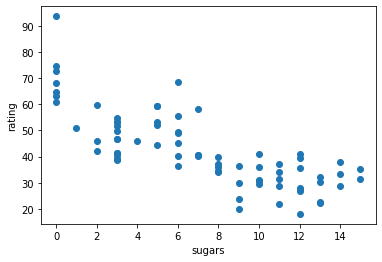

In [4]:

# 설탕함유량(sugars)에 따른 영양등급평가(rating)을 다항 회귀분석으로 예측해보기
# 우선, 두 데이터간 선형성이 있는지 확인
cereal_2 = cereal[['sugars', 'rating']]
cereal_2.sort_values(by='sugars', inplace=True)
cereal_2.reset_index(drop=True, inplace=True)
x=cereal_2['sugars'].values
y=cereal_2['rating'].values

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('sugars')
plt.ylabel('rating')
plt.show()


(53,) (23,)
(53,) (23,)
[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]

=====

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%

=====



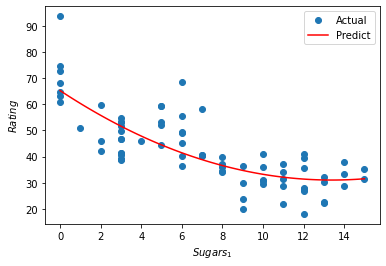

In [5]:

# 7:3의 비율로 train, test 분할하기

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 2차 다항식 조건을 설정한 뒤, x_poly 데이터 생성하기
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_poly, y_train)

# 모델 평가를 위해 x_test를 x_test_poly로 변환하고 predict 후 y_test와 비교해보기
import numpy as np

x_test_poly = poly_reg.fit_transform(x_test.reshape(-1, 1))
pred = reg.predict(x_test_poly)

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred), 1),
                      y_test.reshape(len(y_test), 1)), 1))
print('\n=====\n')
# 다양한 성능평가지표로 예측력 평가해보기
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test.reshape(-1, 1)), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc*100, 3))) # 결정계수
print('\n=====\n')

# 다항 회귀분석 결과 시각화하기
x_new = np.linspace(0, 15, 100).reshape(100, 1)
x_new_poly = poly_reg.transform(x_new)
y_new = reg.predict(x_new_poly)

plt.plot(x, y, 'o', label='Actual') # o : dot
plt.plot(x_new, y_new, 'r-', label='Predict') # r- : red+-(line)
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

In [2]:
# 고차 다항 회귀 분석
# 설명변수를 12개의 데이터로 설정하여 수행

x=cereal.iloc[:, :-1].values
y=cereal.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
x_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_poly, y_train)

import numpy as np
x_test_poly = poly_reg.transform(x_test)
pred = reg.predict(x_test_poly)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc*100, 3))) # 결정계수
print('\n=====\n')

(53, 12) (23, 12) (53,) (23,)
MSE	9.872
MAE	2.102
RMSE	3.142
ACC	92.429%

=====

